In [ ]:
#from tensorflow.compat.v1 import ConfigProto
#from tensorflow.compat.v1 import InteractiveSession
#
#config = ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.5
#config.gpu_options.allow_growth = True
#session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1766: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.applications.resnet import ResNet152
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.mobilenet import MobileNet
from keras.applications.efficientnet import EfficientNetB0
from keras.applications.efficientnet import EfficientNetB7
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet_v2 import ResNet101V2
from keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt

In [4]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [289]:
#model_name = "EfficientNetB0"
#model_name = "InceptionV3"
#model_name = "MobileNet"
#model_name = "MobileNetV2"
#model_name = "ResNet50"
#model_name = "ResNet101"
#model_name = "ResNet152"
#model_name = "ResNet50V2"
#model_name = "ResNet101V2"
#model_name = "ResNet152V2"
#model_name = "VGG16"
#model_name = "VGG19"
model_name = "Xception"

model=load_model(model_name+'/model.h5')

In [290]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """                          
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm=cm.astype('float') /cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    print(cm)

    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(model_name+"/ConfusionMatrix.png")

In [291]:
test_set = test_datagen.flow_from_directory('test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            shuffle=False)

Found 56 images belonging to 3 classes.


In [292]:
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [293]:
import time
num=10
tempo=0
for i in range(num):
    start_time = time.time()
    y_pred = model.predict(test_set)
    tempo = tempo + time.time()-start_time
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [294]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_true=test_set.classes, y_pred=y_pred)

In [295]:
test_set.class_indices

{'black': 0, 'metal': 1, 'red': 2}

Confusion matrix, without normalization
[[17  3  0]
 [ 2 17  0]
 [ 1  1 15]]


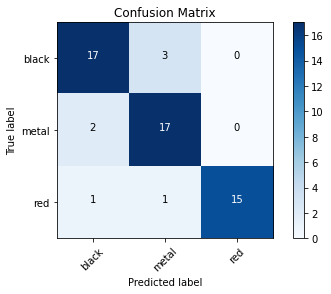

In [296]:
import itertools
cm_plot_labels = ['black','metal','red']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [297]:
print(model_name)
print(classification_report(y_true=test_set.classes, y_pred=y_pred, target_names=['black','metal','red'], digits=3))
print(tempo/num)

VGG19
              precision    recall  f1-score   support

       black      0.850     0.850     0.850        20
       metal      0.810     0.895     0.850        19
         red      1.000     0.882     0.938        17

    accuracy                          0.875        56
   macro avg      0.887     0.876     0.879        56
weighted avg      0.882     0.875     0.877        56

29.635772371292113


In [298]:
import pickle

f = open(model_name+'/history.pckl', 'rb')
history = pickle.load(f)
f.close()

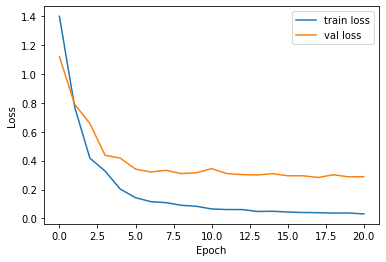

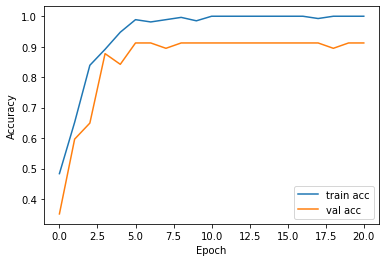

In [299]:
# plot the loss
plt.plot(history['loss'], label='train loss')
plt.plot(history['val_loss'], label='val loss')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig(model_name+'/LossVal_loss.png')
plt.show()

# plot the accuracy
plt.plot(history['accuracy'], label='train acc')
plt.plot(history['val_accuracy'], label='val acc')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig(model_name+'/AccVal_acc.png')
plt.show()

In [300]:
print(model_name)
np.max(history['val_accuracy'])

VGG19


0.9122806787490845